# Stratification v1

In [1]:
import sys

In [2]:
# append parent directory to use utils
sys.path.append("../")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap_experiment
from utils.prop_utils import prop_probs
from utils.strat_utils import calculate_stratified_effects

In [4]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [5]:
lalonde_exp.shape, lalonde_obs.shape

((445, 13), (2675, 13))

## Experimental Data

In [6]:
propensity_probabilities = prop_probs(
    lalonde_exp,
    "treat",
    "re78",
    ["age", "education", "black", "hispanic", "married", "re74", "re75"],
)

In [7]:
lalonde_exp = pd.merge(lalonde_exp, propensity_probabilities, on="id")

In [8]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_exp,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78",
        num_strata=num_strata,
    )

Running experiments: 100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


In [9]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

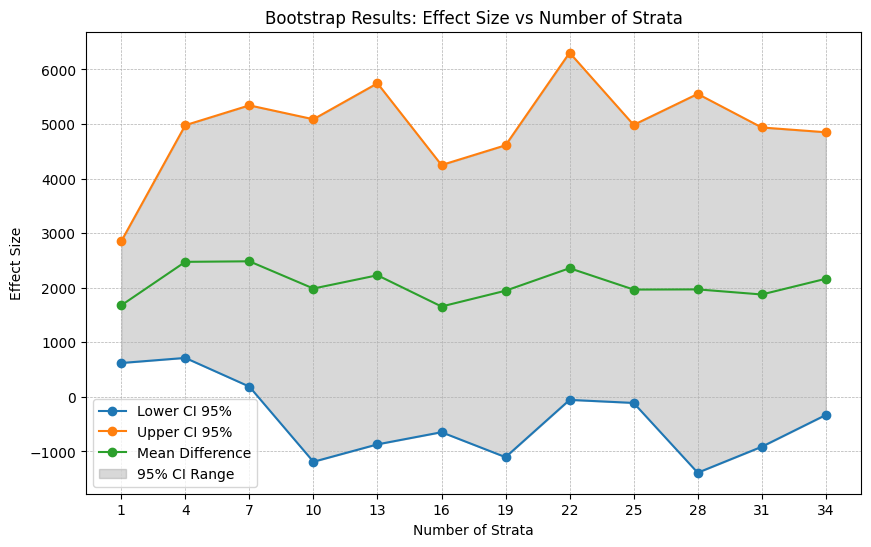

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("Bootstrap Results: Effect Size vs Number of Strata")
plt.legend()
plt.show()

## Observational Data

In [11]:
propensity_probabilities = prop_probs(
    lalonde_obs,
    "treat",
    "re78",
    ["age", "education", "black", "hispanic", "married", "re74", "re75"],
)

In [12]:
lalonde_obs = pd.merge(lalonde_obs, propensity_probabilities, on="id")

In [13]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_obs,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78",
        num_strata=num_strata,
    )

Running experiments: 100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


In [14]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

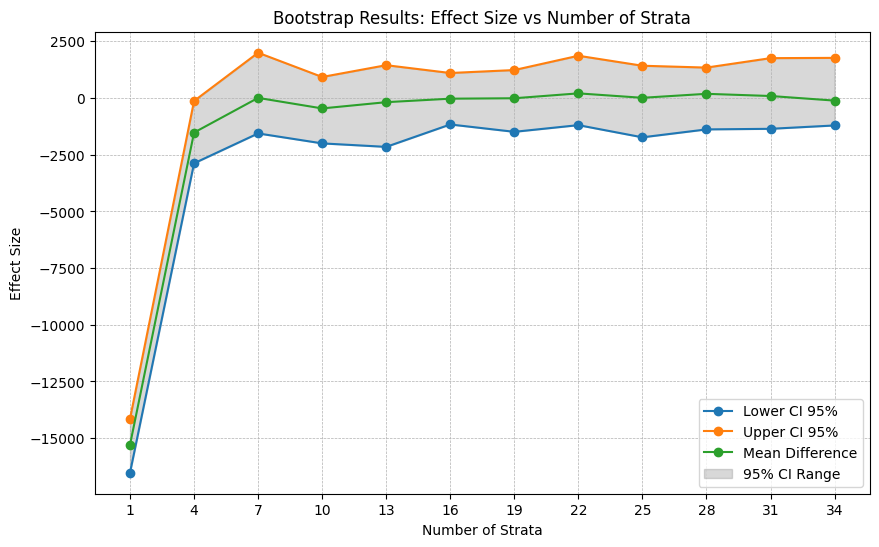

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("Bootstrap Results: Effect Size vs Number of Strata")
plt.legend()
plt.show()

In [16]:
ci_df

,num_strata,mean,lower_ci,upper_ci
0,1,-15294.112711,-16525.806610,-14146.574489
1,4,-1522.340432,-2877.910640,-128.558636
2,7,7.335744,-1559.843167,1999.682591
3,10,-457.201801,-1999.353502,929.688996
4,13,-181.773960,-2153.339771,1450.067914
5,16,-27.670629,-1164.964781,1105.177171
6,19,-8.495425,-1489.322962,1235.469458
7,22,206.964934,-1194.465759,1866.426798
8,25,11.209998,-1731.774241,1425.493757
9,28,186.958005,-1382.474596,1344.190001
